# 二元线性回归

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #绘制3D坐标的函数
import pickle
import scipy.io as io


In [58]:
x = open('/home/blueberry/MachineLearning/Expriment/t1/t1/ex1x.mat','r+').readlines()
x = [float(i.strip('\n')) for i in x]
y = open('/home/blueberry/MachineLearning/Expriment/t1/t1/ex1y.dat','r+').readlines()
y = [float(i.strip('\n')) for i in y]

### 数据显示

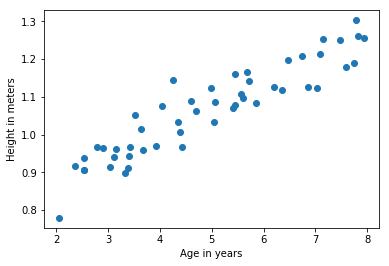

In [59]:
plt.plot(x,y,'o')
plt.xlabel('Age in years')
plt.ylabel('Height in meters')
plt.show()

In [34]:
m = len(y)
x = np.array([np.ones(m),x])
y = np.array(y)
x = x.T
theta = np.array([3,1])

In [35]:
J_vals = np.zeros([100,100])
theta1 = np.arange(-3,3,6/100)
theta2 = np.arange(-1,1,2/100)
for i in range(len(theta1)):
    for j in range(len(theta2)):
        theta = np.array([theta1[i],theta2[j]])
        J_vals[i][j]  = theta.T.dot(x.T).dot(x).dot(theta) + y.T.dot(y) -2*theta.T.dot(x.T).dot(y)
print(np.argmin(J_vals))
print(np.min(J_vals))

6353
0.106664457495


### 数据显示
- 不同的theta值对应的

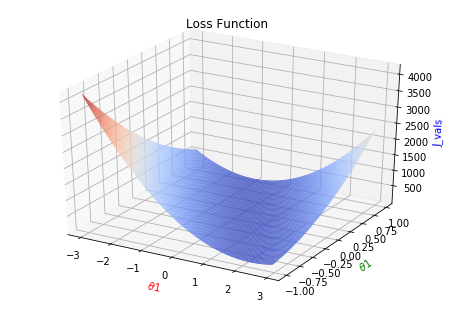

In [36]:
fig1=plt.figure()#创建一个绘图对象
ax=Axes3D(fig1)#用这个绘图对象创建一个Axes对象(有3D坐标)
theta1,theta2= np.meshgrid(theta1,theta2)
plt.title("Loss Function")#总标题
ax.plot_surface(theta1, theta2, J_vals, rstride=1, cstride=1, cmap=plt.cm.coolwarm)#用取样点(x,y,z)去构建曲面
ax.set_xlabel(r'$\theta 1$', color='r')
ax.set_ylabel(r'$\theta 1$', color='g')
ax.set_zlabel(r'J_vals', color='b')#给三个坐标轴注明
plt.show()#显示模块中的所有绘图对象

In [37]:
alpha = 0.07 ##步长learning rate
threshold = 0.000001
loss = []
def predict(x,theta):
    return theta.dot(x.T)
def compute_loss(theta,x,y):
    J_vals  = theta.T.dot(x.T).dot(x).dot(theta) + y.T.dot(y) -2*theta.T.dot(x.T).dot(y)
    return J_vals

In [38]:
this_loss = compute_loss(theta,x,y)
loss.append(this_loss)
this_loss = 0
t1 = theta[0]
t2 = theta[1]
for _ in range(1500):
    loss.append(this_loss)
    t1 = t1 - alpha *np.sum((x.dot(theta)-y)*x[:,0])/m
    t2 = t2 - alpha *np.sum((x.dot(theta)-y)*x[:,1])/m
    theta = np.array([t1,t2])
#     theta = theta - alpha * x.T.dot(x.dot(theta) - y)/m
    this_loss = compute_loss(theta,x,y)
loss.remove(0)

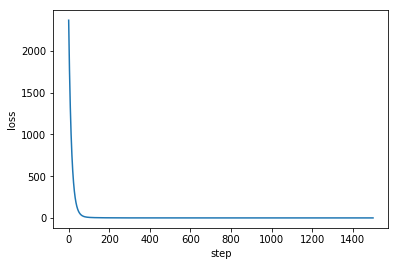

0.0987070033746


array([ 0.75019581,  0.06387511])

In [39]:
loss_x = np.arange(0,len(loss),1)
plt.plot(loss_x,loss,'-')
plt.xlabel('step')
plt.ylabel('loss')
plt.show()
print(np.min(loss))
theta

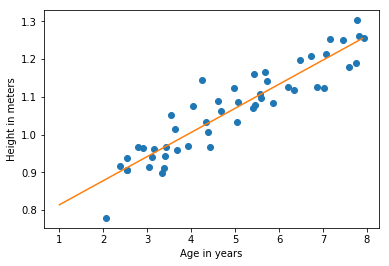

In [40]:
plt.plot(x[:,1],y,'o')
plt.xlabel('Age in years')
plt.ylabel('Height in meters')
x_ax = np.arange(np.min(x),np.max(x),0.1)
x_w = np.array([np.ones(len(x_ax)),x_ax])
y_pre = x_w.T.dot(theta)
plt.plot(x_ax,y_pre,'-')
y_pre
plt.show()

array([ 0.75016254,  0.06388117])